# Import relevant packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from xgboost import XGBClassifier
import pickle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset

### Context 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. With such datasets you could try to predict which customers may be interested in specific products and allow you to generate future marketing and sales leads.

In [39]:
# Define the URL of the dataset
url = "https://raw.githubusercontent.com/konradbachusz/AI-training/main/classification/data/bank_cleaned.csv"

# Read the dataset from the URL
data = pd.read_csv(url)

# Show a sample of the data

In [40]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


# Data preprocessing and feature engineering

In [41]:
# One hot encode categorical features
categorical_features = data.select_dtypes(include=['object']).columns
one_hot = OneHotEncoder()
one_hot_df = pd.DataFrame(one_hot.fit_transform(data[categorical_features]).toarray(), columns=one_hot.get_feature_names_out(categorical_features))

#Remove original features
data = pd.concat([data.drop(categorical_features, axis=1), one_hot_df], axis=1)
data.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary,job_admin.,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown,response_no,response_yes
0,0,58,2143,5,4.35,1,-1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,44,29,5,2.52,1,-1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,33,2,5,1.27,1,-1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,5,35,231,5,2.32,1,-1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,6,28,447,5,3.62,1,-1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Split the data into train and test

In [42]:
#Features
X = data.drop('response_binary', axis=1)

#Target variable
y = data['response_binary']

#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a logistic regression machine learning model

In [43]:

# Train a logistic regression machine learning model
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Linear Regression: Print accuracy, precision, recall and AUC of the model and show the confusion matrix

In [ ]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("AUC: ", roc_auc_score(y_test, y_pred_lr))

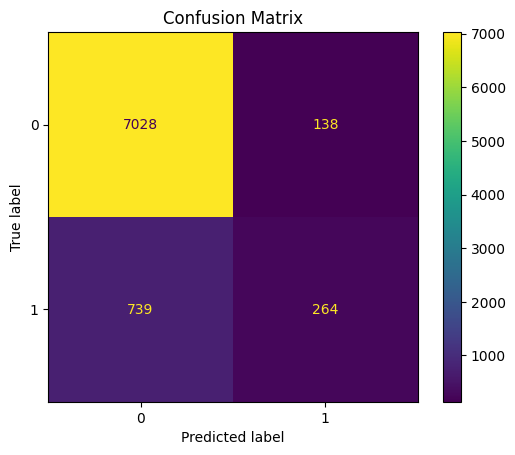

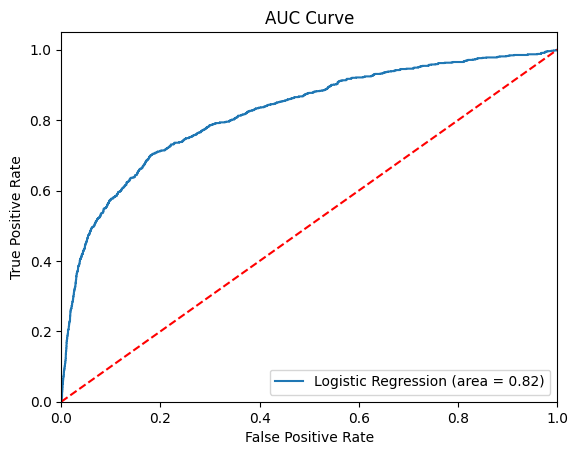

In [54]:


#Get prediction probabilities
y_pred_proba_lr = lr.predict_proba(X_test)[:,1]

#Get true positive rate and false positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

#Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_lr)
plt.title('Confusion Matrix')
plt.show()

#Display the AUC Curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()


# Train a XGBoost machine learning model

In [46]:

# Train a XGBoost machine learning model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# XGBoost: Print accuracy, precision, recall and AUC of the model and show the confusion matrix

In [47]:
# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Precision: ", precision_score(y_test, y_pred_xgb))
print("Recall: ", recall_score(y_test, y_pred_xgb))
print("AUC: ", roc_auc_score(y_test, y_pred_xgb))

#Get prediction probabilities
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

#Get true positive rate and false positive rate
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

#Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_xgb)
plt.title('Confusion Matrix')
plt.show()

#Display the AUC Curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='Logistic Regression (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()


XGBoost Metrics:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
AUC:  1.0


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:

# Save the final model to a pickle file
pickle.dump(xgb, open("xgb_model.pkl", "wb"))


# Load a pre-trained model

In [ ]:
# Define a function to load the model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Call the function to load the model
pretrained_model = load_model('xgb_model.pkl')

# Print a success message
print("The model has been successfully loaded.")

# Make a prediction on new data

In [ ]:
# Get the 50th row of the X_test DataFrame
person1 = X_test.iloc[50]
person1

In [ ]:
# Get the 12th row of the X_test DataFrame
person2 = X_test.iloc[12]
person2

In [ ]:
#Get a gauge chart to visualize prediction probabilities
def gauge_chart(value):
    # Check if the value is within the range [0, 100]
    if not 0 <= value <= 100:
        raise ValueError("The value must be between 0 and 100.")

    # Normalize the value to be between 0 and 1
    normalized_value = value / 100

    # Create the figure
    fig, ax = plt.subplots()

    # Define the angle range for the gauge
    angle_range = np.linspace(0, 180, 100)

    # Define the radius of the gauge
    radius = 1

    # Create the gauge
    ax.fill_between(angle_range, radius, color="lightgray")
    ax.fill_between(angle_range[:int(normalized_value*100)], radius, color="dodgerblue")

    # Remove labels and ticks
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # Set the title
    ax.set_title("Probability % of signing up for the financial product")

    # Display the value in the middle of the gauge
    ax.text(0.5, 0.5, str(value), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color="dimgrey", fontsize=15)

    # Show the plot
    plt.show()


#Make predictions using the model
def predict_person(person):

  # Reshape the data to 2D array as the model expects a 2D array as input
  data_2d = person.values.reshape(1, -1)

  # Use the model to predict the label
  prediction = pretrained_model.predict(data_2d)
  prediction_proba = pretrained_model.predict_proba(data_2d)
  prediction_proba=round(prediction_proba[-1][-1],4)

  print("\nPerson 1")
  print("Predicted class:",prediction)
  print("Predicted probability:",prediction_proba)
  gauge_chart(round(prediction_proba*100,2))




In [ ]:
#Will person 1 apply for the financial product?
predict_person(person1)

In [ ]:
#Will person 2 apply for the financial product?
predict_person(person2)